# Triangulation and Trilateration Demos



In [1]:
#Suppress warnings as matplotlib constructs some files it needs on first run
import warnings
warnings.filterwarnings("ignore")

In [2]:
%matplotlib inline
#Configure the notebooks to display plots inline and import some plotting tools
import matplotlib.pyplot as plt

#Seaborn provides nicer charts
import seaborn as sns
#We could define an OU theme
sns.set_style("whitegrid")

In [3]:
#Define the circular areas - first the origins as a pair of co-ords then the radius
circle1=((3,2), 2)
circle2=((2,0), 1.5)
circle3=((1,2), 1.5)

In [4]:
#Make use of a third party library that implements some localisation functions
#Originally via https://github.com/kamalshadi/Localization
#The function could be made available via a package install rather than having the code visible

import localization as lx

def localiser(c1, c2, c3, mode='2D',solver='CCA', detail=False):
    
    #Define the localisation algorithm to use - here we find the centroid of the intersection
    P=lx.Project(mode=mode,solver=solver,detail=detail)

    #Create objects using the localization package with appropriate paramters
    P.add_anchor('A',c1[0])
    P.add_anchor('B',c2[0])
    P.add_anchor('C',c3[0])
    t,label=P.add_target()
    t.add_measure('A',c1[1])
    t.add_measure('B',c2[1])
    t.add_measure('C',c3[1])
    
    #Find the centroid of intersection of the circles
    tmp=P.solve()
    
    if detail: return tmp,t
    
    return t.loc.x,t.loc.y

In [5]:
localiser(circle1,circle2,circle3)

(1.74887839189825, 1.1310668205951402)

In [6]:
#We can also get detail about the intersection area
x=localiser(circle1,circle2,circle3,detail=True)
x

((3,
  <shapely.geometry.polygon.Polygon at 0x7fedb9663eb8>),
 <localization.geoInterface.Target at 0x7fedb9663cc0>)

0.6606682376981607
1.74887839189825 1.1310668205951402


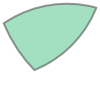

In [7]:
#Display centroid info

#We could use the area (of the intersection area) to set the radius of an uncertainty dot?
print(x[0][2].area)
print(x[0][2].centroid.x,x[0][2].centroid.y)
x[0][2]

In [8]:
#The function could be made available via a package install rather than having the code visible
from descartes import PolygonPatch
from matplotlib.collections import PatchCollection
def plotCircles(c1, c2, c3, point=None, area=None):
    
    #Plot the circles
    circle1_plot = plt.Circle(c1[0], radius=c1[1],color='g',fill=None)
    circle2_plot = plt.Circle(c2[0], c2[1],color='g',fill=None)
    circle3_plot = plt.Circle(c3[0], c3[1],color='g',fill=None)

    #We'll create each plot as a subplot and then combine them
    fig, ax = plt.subplots() 

    #Make sure the axes have a 1:1 aspect ratio
    #Also set the axis limits (we could calculate these)
    plt.axis('equal')
    plt.xlim(-5,10)
    plt.ylim(-5,10)

    #add each plot to the same axis set
    ax.add_artist(circle1_plot)
    ax.add_artist(circle2_plot)
    ax.add_artist(circle3_plot)

    if area is not None:
        ax.add_collection(PatchCollection([PolygonPatch(area[0], facecolor='blue', alpha=1)], match_original=True))
        
    #Add a point to show the localised centroid
    #Centroid found using localization function
    if point is not None:
        ax.scatter(point[0],point[1],color='r')

    #Display the plot
    plt.show()

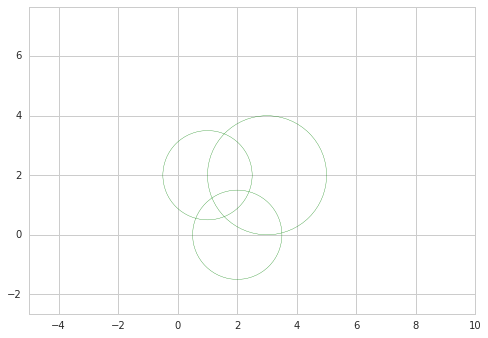

In [9]:
plotCircles(circle1,circle2,circle3)
pass

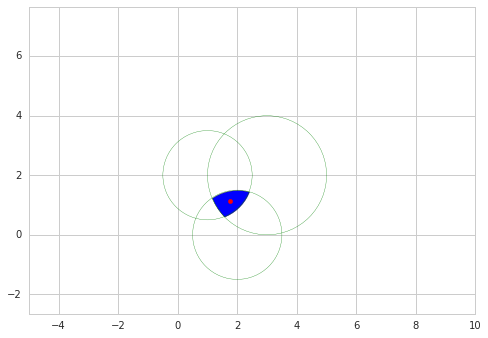

In [10]:
#Add a point to show the localised centroid
#Centroid found using localization function
x=localiser(circle1,circle2,circle3,detail=True)
centroid=(x[0][2].centroid.x,x[0][2].centroid.y)
plotCircles(circle1,circle2,circle3, centroid,area=(x[0][2],1) )

### Exploring an interactive localiser

In [11]:
from ipywidgets import interact, widgets

In [12]:
points= widgets.Textarea()

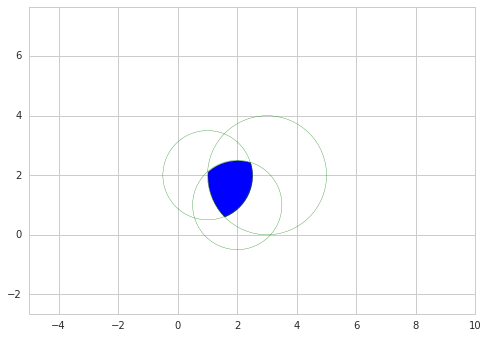

In [18]:
c1,c2,c3=circle1,circle2,circle3

def f(x1=c1[0][0],y1=c1[0][1],r1=c1[1],
      x2=c2[0][0],y2=c2[0][1],r2=c2[1],
      x3=c3[0][0],y3=c3[0][1],r3=c3[1],
      centre=False, area=False):
    
    c1=((x1,y1),r1)
    c2=((x2,y2),r2)
    c3=((x3,y3),r3)
    
    x=localiser(c1,c2,c3,detail=True)
    centroid=x[0][2].centroid.x,x[0][2].centroid.y
    centre=None if not centre else centroid
    area=None if not area else (x[0][2],1)
        
    plotCircles(c1,c2,c3,centre, area)
    
    centretxt='' if not centre else 'Midpoint: {:.2f} {:.2f}'.format(centre[0],centre[1])
    points.value='''
    Circle 1: centre {}, radius {}
    Circle 2: centre {}, radius {}
    Circle 3: centre {}, radius {}
    {}'''.format((x1,y1),r1,(x2,y2),r2,(x3,y3),r3,centretxt)
    
interact(f, x1=(0.0,4.0), y1=(1.0,5.0), r1=(1.0,3.0),
            x2=(0.0,4.0), y2=(1.0,5.0), r2=(1.0,3.0),
            x3=(0.0,4.0), y3=(1.0,5.0), r3=(1.0,3.0),
            centre=False, area=False)
points